# <center> Artificial Neural Networks </center>

- basic concepts of artificial neural networks
- building a perceptron classifier
- building a single layer neural network
- building a multilayer neural network
- analyzing sequential data with RNNs (possible)
- constructing an OCR engine

## 1. Basic Concepts

![](colorednn.svg)
<p style='float:right;'>Credits: By Glosser.ca [CC BY-SA 3.0], via Wikimedia Commons</p>

- history starting in 1940s (some argue for even earlier)
- not much progress because of the lack of: computational power and large datasets
- ANNs (composed of artificial neurons) seek problem solving similar to the human brain
- used for tasks like: speech recognition, computer vision, recommender systems, medical diagnosis, etc.
- require numerical input data

#### The training process (usually):

<p><center> Labeled data (dataset) => Numerical data => Training to minimize error (difference between the predicted and the actual output)</center></p>

## 2. The Perceptron

- artificial neuron - receives input => does computation on it => produces an output

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl
%matplotlib inline

In [2]:
num_dataset = np.array([[0.22, 0.34, 0], [0.21, 0.37, 0], [0.25, 0.31, 0], [0.76, 0.19, 1], [0.84, 0.14, 1]])

In [3]:
features = num_dataset[:, :2]
labels = num_dataset[:, 2].reshape((num_dataset.shape[0], 1))

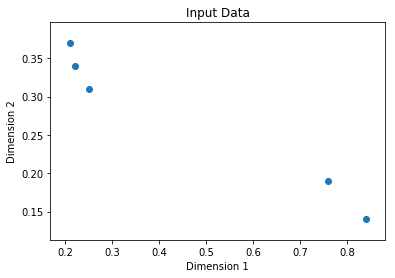

In [4]:
plt.scatter(features[:,0], features[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input Data')

In [5]:
dim1_min, dim1_max, dim2_min, dim2_max = 0, 1, 0, 1

In [6]:
num_output = labels.shape[1]

In [7]:
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]

In [8]:
perceptron = nl.net.newp([dim1, dim2], num_output)

The goal of learning is reached


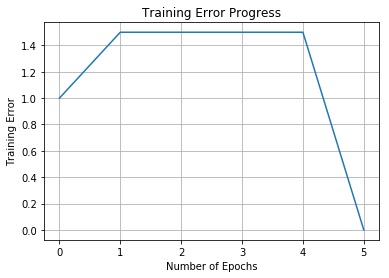

In [9]:
error_progress = perceptron.train(features, labels, epochs=100, show=20, lr=0.03)

plt.plot(error_progress)
plt.xlabel('Number of Epochs')
plt.ylabel('Training Error')
plt.title('Training Error Progress')
plt.grid()

In [10]:
perceptron.sim([[0.81, 0.23]])

array([[ 1.]])

In [11]:
perceptron.sim([[0.27, 0.42]])

array([[ 0.]])

## 3. Single Layer Neural Network

- collection of artificial neurons

In [12]:
text = np.loadtxt('data_simple_nn.txt')
data = text[:, 0:2]
labels = text[:, 2:]

text

array([[ 1. ,  4. ,  0. ,  0. ],
       [ 1.1,  3.9,  0. ,  0. ],
       [ 1.2,  4.1,  0. ,  0. ],
       [ 0.9,  3.7,  0. ,  0. ],
       [ 7. ,  4. ,  0. ,  1. ],
       [ 7.2,  4.1,  0. ,  1. ],
       [ 6.9,  3.9,  0. ,  1. ],
       [ 7.1,  4.2,  0. ,  1. ],
       [ 4. ,  1. ,  1. ,  0. ],
       [ 4.1,  0.9,  1. ,  0. ],
       [ 4.2,  1.1,  1. ,  0. ],
       [ 3.9,  0.8,  1. ,  0. ],
       [ 4. ,  7. ,  1. ,  1. ],
       [ 4.2,  7.2,  1. ,  1. ],
       [ 3.9,  7.1,  1. ,  1. ],
       [ 4.1,  6.8,  1. ,  1. ]])

In [13]:
data

array([[ 1. ,  4. ],
       [ 1.1,  3.9],
       [ 1.2,  4.1],
       [ 0.9,  3.7],
       [ 7. ,  4. ],
       [ 7.2,  4.1],
       [ 6.9,  3.9],
       [ 7.1,  4.2],
       [ 4. ,  1. ],
       [ 4.1,  0.9],
       [ 4.2,  1.1],
       [ 3.9,  0.8],
       [ 4. ,  7. ],
       [ 4.2,  7.2],
       [ 3.9,  7.1],
       [ 4.1,  6.8]])

In [14]:
labels

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

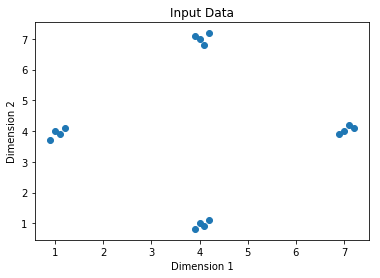

In [15]:
plt.scatter(data[:,0], data[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input Data')

In [16]:
dim1_min, dim1_max = data[:,0].min(), data[:,0].max()
dim2_min, dim2_max = data[:,1].min(), data[:,1].max()
num_output = labels.shape[1]

dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
snn = nl.net.newp([dim1, dim2], num_output)

In [17]:
error_progress = snn.train(data, labels, epochs=100, show=20, lr=0.03)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
The maximum number of train epochs is reached


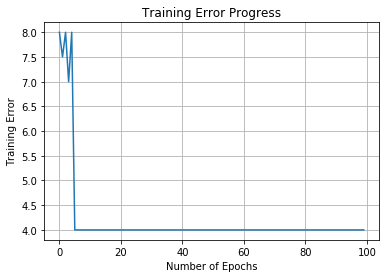

In [18]:
plt.plot(error_progress)
plt.xlabel('Number of Epochs')
plt.ylabel('Training Error')
plt.title('Training Error Progress')
plt.grid()

In [19]:
print('Testing Data:\n')
testing_data = [[0.3, 4.2], [4.3, 0.5], [4.6, 8]]
for i in testing_data:
    print(i, '==>', snn.sim([i])[0])

Testing Data:

[0.3, 4.2] ==> [ 0.  0.]
[4.3, 0.5] ==> [ 1.  0.]
[4.6, 8] ==> [ 1.  1.]


## 4. Multi-Layer Neural Network

- y=3x^2+5

In [20]:
min_vals = -20
max_vals = 20
num_points = 140

x = np.linspace(min_vals, max_vals, num_points)
y = 3*np.square(x)+5
y /= np.linalg.norm(y)

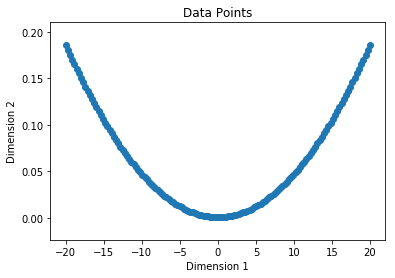

In [21]:
data = x.reshape(num_points,1)
labels = y.reshape(num_points, 1)

plt.scatter(data, labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data Points')

In [22]:
mlnn = nl.net.newff([[min_vals, max_vals]], [10,6,1])
mlnn.trainf = nl.train.train_gd
error_progress = mlnn.train(data, labels, epochs=2000, show=100, goal=0.01)

Epoch: 100; Error: 0.030976642476286634;
Epoch: 200; Error: 0.03140009256159158;
Epoch: 300; Error: 0.04702841030285462;
Epoch: 400; Error: 0.0300158878582859;
Epoch: 500; Error: 0.025818917880989948;
Epoch: 600; Error: 0.02077854720279131;
Epoch: 700; Error: 0.018392908961728346;
Epoch: 800; Error: 0.015136734322366296;
Epoch: 900; Error: 0.013966372169017256;
Epoch: 1000; Error: 0.012420129878600963;
Epoch: 1100; Error: 0.011222377635222505;
Epoch: 1200; Error: 0.0104931653310446;
The goal of learning is reached


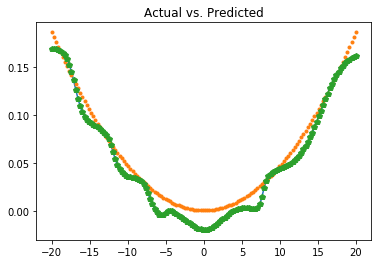

In [23]:
output = mlnn.sim(data)
y_pred = output.reshape(num_points)

x_dense = np.linspace(min_vals, max_vals, num_points*2)
y_dense_pred = mlnn.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)

plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Actual vs. Predicted')

## 5. Recurrent Neural Network

- analysis of sequential data (weather, stock, traffic, video feeds)
- suitable for time-series 
- require more complex architectures

In [25]:
def get_data(num_points):
    w_one = 0.6 * np.sin(np.arange(0, num_points))
    w_two = 3.5 * np.sin(np.arange(0, num_points))
    w_three = 1.2 * np.sin(np.arange(0, num_points))
    w_four = 4.6 * np.sin(np.arange(0, num_points))
    
    a_one = np.ones(num_points)
    a_two = 2.2 + np.zeros(num_points)
    a_three = 3.1 * np.ones(num_points)
    a_four = 0.9 + np.zeros(num_points)
    
    wave = np.array([w_one, w_two, w_three, w_four]).reshape(num_points*4,1)
    amp = np.array([a_one, a_two, a_three, a_four]).reshape(num_points*4,1)
    
    return wave, amp

def visualize_output(nn, num_points_test):
    wave, amp = get_data(num_points_test)
    output = nn.sim(wave)
    plt.plot(amp.reshape(num_points_test*4))
    plt.plot(output.reshape(num_points_test*4))
    
if __name__ == '__main__':
    num_points = 50
    wave, amp = get_data(num_points)